<a href="https://colab.research.google.com/github/albernazz/Primeira-Rede-Neural/blob/main/Rede_Neural_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [3]:
transform = transforms.ToTensor() #definindo a conversão de imagen para tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) # Carrega a parte de treino do dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=54, shuffle=True) # Cria un buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) #Carrega a parte de validação do dataset
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) #e Cria un buffer para pegar os dados por partes

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 60.0MB/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.12MB/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.02MB/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



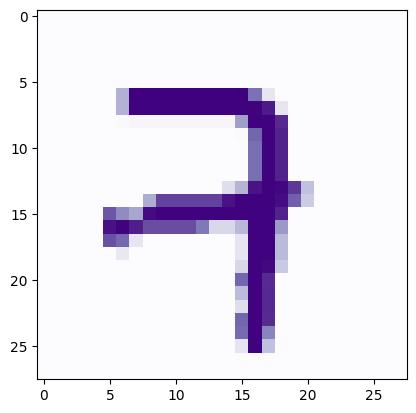

In [4]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='Purples');

In [5]:
print(imagens[0].shape)#para verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape)#para verificr as dimensões do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [6]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        # Camada de entrada: 784 neurônios (28x28 pixels) se conectam a 128 neurônios
        self.linear1 = nn.Linear(28*28, 128)
        # Camada interna 1: 128 neurônios se conectam a 64 neurônios
        self.linear2 = nn.Linear(128, 64)
        # Camada de saída: 64 neurônios se conectam a 10 neurônios (classes)
        self.linear3 = nn.Linear(64, 10)

    def forward(self, x):
        # Passagem pela rede neura
        x = F.relu(self.linear1(x))  # Função de ativação ReLU na primeira camada
        x = F.relu(self.linear2(x))  # Função de ativação ReLU na segunda camada
        x = self.linear3(x)         # Última camada linear (sem função de ativação)
        # Aplicamos softmax para obter as probabilidades de cada classe
        output = F.softmax(x, dim=1)
        return output

In [7]:
def treino(modelo, trainloader, device):
    criterion = nn.NLLLoss()  # Critério de perda: Negative Log Likelihood Loss
    optimizer = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)  # Otimizador: Stochastic Gradient Descent

    EPOCHS = 18  # Número de vezes que o modelo passa por todo o conjunto de dados

    modelo.train()  # Coloca o modelo em modo de treinamento

    for epoch in range(EPOCHS):
        perda_acumulada = 0
        start_time = time.time()

        for imagens, etiquetas in trainloader:
            imagens = imagens.view(imagens.shape[0], -1).to(device)  # Converte imagens em tensores e envia para o dispositivo
            etiquetas = etiquetas.to(device)

            optimizer.zero_grad()  # Zera os gradientes acumulados
            output = modelo(imagens)  # Passa as imagens pelo modelo para obter as predições
            perda = criterion(output, etiquetas)  # Calcula a perda
            perda.backward()  # Calcula os gradientes
            optimizer.step()  # Atualiza os parâmetros do modelo

            perda_acumulada += perda.item()

        end_time = time.time()
        print(f"Época {epoch+1}/{EPOCHS}, Perda: {perda_acumulada/len(trainloader):.4f}, Tempo: {end_time-start_time:.2f}s")

In [8]:
def validacao(modelo, valloader, device):
    """
    Calcula a precisão do modelo em um conjunto de validação.

    Args:
        modelo: O modelo de aprendizado de máquina a ser avaliado.
        valloader: O carregador de dados para o conjunto de validação.
        device: O dispositivo (CPU ou GPU) onde o modelo está sendo executado.
    """

    conta_corretas = 0
    conta_todas = 0

    with torch.no_grad():
        for imagens, etiquetas in valloader:
            imagens = imagens.view(imagens.shape[0], -1).to(device)
            etiquetas = etiquetas.to(device)

            # Obtenha as predições do modelo (softmax é uma boa opção para classificação multiclasse)
            logps = modelo(imagens)
            ps = torch.exp(logps)
            probabilidades, indices_preditos = torch.max(ps, 1)

            conta_corretas += torch.sum(indices_preditos == etiquetas).item()
            conta_todas += len(etiquetas)

    # Calcular a precisão
    acuracia = (conta_corretas / conta_todas) * 100
    print(f"Precisão do modelo: {acuracia:.2f}%")

In [9]:
Modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)